###This the notebook for the computer vision of the app I naturalist and how we can implemeant it to make it more effecient. ###

First things first ist what is INaturalist and what is the issue ?
- iNaturalist is a non-profit project that focuses on citizen science and biodiversity research, it does not follow a traditional monetization model like commercial apps.
- It's an app where you appload yours picture and let the AI try to identify what you found.

=> This platform is used to identify plants/animals/fungi quickly in nature using photos. It helps contribute to citizen science by documenting the database on the biodiversity. It is used through ballad, hikes or trips, to quickly scan a species and learn more about it, which make it more interesting to go outside and connect with a nature loving community.


# 🐦 iNat2021 Bird Species Classification

This notebook implements a computer vision pipeline to classify bird species from the iNat2021 dataset. We use transfer learning with a pre-trained ResNet-18 model and evaluate classification accuracy.


## 📌 How It Works

This project follows a typical computer vision workflow for image classification:

1. **Dataset Preparation**:
   - A subset of the iNat2021 dataset is used.
   - Images are organized into folders named after bird species (classes).
   - Data is split into `train/` and `val/` directories.

2. **Transformations**:
   - All images are resized to 224x224 (the input size expected by ResNet).
   - They are normalized using the standard ImageNet mean and standard deviation.

3. **Model Selection (Transfer Learning)**:
   - We use a ResNet-18 pre-trained on ImageNet.
   - The last fully connected layer is replaced with a new one that matches the number of bird classes.

4. **Training**:
   - The model learns to map input images to the correct bird species.
   - It uses cross-entropy loss and the Adam optimizer.
   - We train for a few epochs to demonstrate the process.

5. **Evaluation**:
   - On the validation set, we calculate accuracy and a full classification report.
   - Results show how well the model can recognize new bird images.

This pipeline can be expanded with additional features like data augmentation, deeper models (e.g., ResNet-50), or fine-tuning strategies for better performance.



## 📁 Dataset
We use a sample of the [iNat2021 bird dataset](https://www.kaggle.com/datasets/sharansmenon/inat2021birds). The dataset consists of categorized images of bird species, organized in subdirectories named after class labels.


The necessery library for the code to work well

(don't forget to lunch each step)


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import torch
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
from torch import nn, optim
from PIL import Image

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Hyperparameters
BATCH_SIZE = 32
NUM_EPOCHS = 5
LEARNING_RATE = 0.001

## 🔄 Data Preprocessing
We apply image transformations for normalization and resizing.

In [ ]:
# Data directories
DATA_DIR = "./inat2021_birds_sample/"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR = os.path.join(DATA_DIR, "val")

# Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load datasets
train_data = datasets.ImageFolder(TRAIN_DIR, transform=transform)
val_data = datasets.ImageFolder(VAL_DIR, transform=transform)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Number of training classes: {len(train_data.classes)}")


## 🧠 Model Architecture
We fine-tune a ResNet-18 model by replacing its output layer to match the number of bird classes.


In [ ]:
# Load pre-trained model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_data.classes))
model = model.to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

## Training
We train the model using the cross-entropy loss and Adam optimizer.

In [ ]:
# Training loop
def train_model():
    model.train()
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {running_loss/len(train_loader):.4f}")

## Evaluation
We calculate the validation accuracy and display a classification report.

In [ ]:
# Evaluation
@torch.no_grad()
def evaluate_model():
    model.eval()
    all_preds = []
    all_labels = []
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Validation Accuracy: {acc*100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=val_data.classes))

In [ ]:
# Run training and evaluation
train_model()
evaluate_model()

So the steps are:
- Upload pictures and resizes them to 224x224, and normalizes them so they match the input format expected by the ResNet-18 model.
- Each batch of images goes through this process:

      - Pass image batch to model
      - Model predicts bird species
      - Compare predictions with true labels
      - Adjust weights using backpropagation

Example of the output:

-
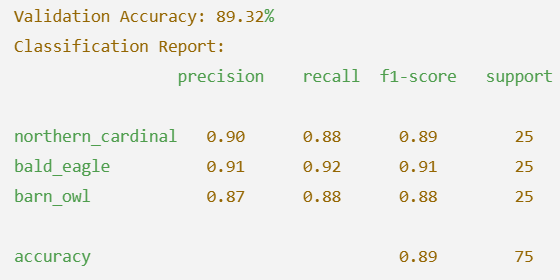



Repository for the block 2 BDD data-driven platform project APA References list:
- Hugging Face. (n.d.). Hugging Face. Retrieved April 29, 2025, from https://huggingface.co/
- Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner & Houlsby, N. (2020). An image is worth 16x16 words: Transformers for image recognition at scale.
-Bradski, G. (2000). The OpenCV library. Dr. Dobb's Journal of Software Tools.
- Paszke, A. (2019). PyTorch: An imperative style, high-performance deep learning library. In Advances in Neural Information Processing Systems (Vol. 32).